# Step-1
## Processing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

In [4]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [5]:
dfx.shape

(576, 8)

In [6]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [7]:
dfy.shape

(576, 1)

In [8]:
X = dfx.values
Y = dfy.values

In [9]:
X

array([[  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

In [10]:
Y = Y.reshape((-1,))

In [11]:
Y

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# Step-2
## KNN Algorithm

In [12]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, query_point, k = 6):
    vals = []
    
    total_rows = X.shape[0]
    
    for i in range(total_rows):
        dist_from_ith_row = dist(X[i], query_point)
        vals.append((dist_from_ith_row, Y[i]))
    
    vals.sort()
    
    vals = vals[:k]
    
    vals = np.array(vals)
    
    classes = vals[ : , 1]
    classes = np.unique(classes, return_counts = True)
    max_freq_index = np.argmax(classes[1])
    
    return int(classes[0][max_freq_index])
    
    

# Step-3
## Testing the model

In [13]:
test_x = pd.read_csv('Diabetes_Xtest.csv')


In [14]:
test_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [15]:
query_points = test_x.values

In [16]:
d = 0
nd = 0
with open('file.csv', 'w', encoding='utf-8') as f:
    heading = 'Outcome' + '\n'
    f.write(heading)

    for qp in query_points:
        predicted_val = knn(X, Y, qp, k=25)
        if predicted_val == 0:
            nd = nd + 1
        else:
            d = d + 1
        line = str(predicted_val) + '\n'
        f.write(line)

# Step-4
## Visualizing the predictions

<BarContainer object of 2 artists>

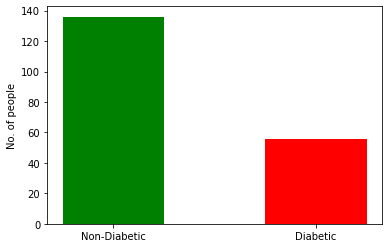

In [17]:
x_cord = [0, 1]
heights = [nd, d]
plt.ylabel('No. of people')
plt.bar(x_cord, heights, width = 0.5, tick_label=['Non-Diabetic', 'Diabetic'], color=['green', 'red'])